# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import g_key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
cities


['puerto leguizamo',
 'kilmez',
 'jamestown',
 'nikolskoye',
 'bethel',
 'hithadhoo',
 'vardo',
 'tuktoyaktuk',
 'san vicente',
 'nanortalik',
 'ponta do sol',
 'ushuaia',
 'albany',
 'hermanus',
 'saint george',
 'punta arenas',
 'omsukchan',
 'mar del plata',
 'solnechnyy',
 'myitkyina',
 'sao joao da barra',
 'palabuhanratu',
 'tura',
 'barrow',
 'ha',
 'barentsburg',
 'pak phanang',
 'grand river south east',
 'tasiilaq',
 'huarmey',
 'jacareacanga',
 'hobart',
 'busselton',
 'daliao',
 'mataura',
 'belushya guba',
 'sabang',
 'rikitea',
 'srednekolymsk',
 'sampit',
 'port alfred',
 'cape town',
 'saleaula',
 'naples',
 'georgetown',
 'oros',
 'castro',
 'mecca',
 'mehamn',
 'provideniya',
 'illoqqortoormiut',
 'esperance',
 'sistranda',
 'east london',
 'qaanaaq',
 'butaritari',
 'bredasdorp',
 'carnarvon',
 'amderma',
 'luderitz',
 'touros',
 'yellowknife',
 'narsaq',
 'kapaa',
 'korla',
 'klaksvik',
 'monte gordo',
 'khatanga',
 'saldanha',
 'faanui',
 'santo antonio da platina'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

# set up lists to hold reponse info
lat = []
lng= []
temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
clean_city_list= []

# assign variables to count record number and set number
record_num = 0
set_num = 1

print('''
Beginning Data Retrieval
-------------------------------''')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_num == 50:
            set_num +=1
            record_num = 1
            clean_city_list.append(city)
        else:
            record_num +=1
            clean_city_list.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    except (KeyError, IndexError):
        print("City not found....Skipping............")
print('''-------------------------------
Data Retrieval Complete
-------------------------------
''')


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | khandyga
Processing Record 5 of Set 1 | kutum
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | amarpatan
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | roald
Processing Record 11 of Set 1 | saint-augustin
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | bilma
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | bo phloi
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | pitimbu
Processing Record 23 of Set 1 | hermanus
Pr

Processing Record 35 of Set 4 | sambava
Processing Record 36 of Set 4 | faanui
Processing Record 37 of Set 4 | bhadrachalam
Processing Record 38 of Set 4 | shenkursk
Processing Record 39 of Set 4 | puerto escondido
Processing Record 40 of Set 4 | awjilah
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | vytegra
Processing Record 43 of Set 4 | black river
Processing Record 44 of Set 4 | jacareacanga
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | gidam
Processing Record 49 of Set 4 | livramento
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | prieska
Processing Record 5 of Set 5 | takaungu
Processing Record 6 of Set 5 | garautha
Processing Record 7 of Set 5 | lodja
Processing Record 8 of Set 5 | torbay
Proce

Processing Record 22 of Set 8 | henties bay
Processing Record 23 of Set 8 | qaqortoq
Processing Record 24 of Set 8 | houma
Processing Record 25 of Set 8 | coihaique
Processing Record 26 of Set 8 | pokhara
Processing Record 27 of Set 8 | elliot lake
Processing Record 28 of Set 8 | nyurba
Processing Record 29 of Set 8 | fortuna
Processing Record 30 of Set 8 | bac lieu
Processing Record 31 of Set 8 | waingapu
Processing Record 32 of Set 8 | constantine
Processing Record 33 of Set 8 | beyneu
Processing Record 34 of Set 8 | moundou
Processing Record 35 of Set 8 | jonava
Processing Record 36 of Set 8 | vyazemskiy
Processing Record 37 of Set 8 | eirunepe
Processing Record 38 of Set 8 | otofuke
Processing Record 39 of Set 8 | leshukonskoye
Processing Record 40 of Set 8 | panguna
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | kalat
Processing Record 43 of Set 8 | troitskoye
Processing Record 44 of Set 8 | sorland
Processing Record 45 of Set 8 | gonaives
Processing Re

Processing Record 1 of Set 12 | nilai
Processing Record 2 of Set 12 | callaway
Processing Record 3 of Set 12 | batagay
Processing Record 4 of Set 12 | dahra
Processing Record 5 of Set 12 | mokobeng
-------------------------------
Data Retrieval Complete
-------------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create DataFrame
weather_df = pd.DataFrame({"City":clean_city_list,
                          "Lat":lat, 
                          "Lng":lng,
                          "Max_temp":temp,
                          "Humidity":humidity,
                          "Cloudiness":cloud,
                          "Wind_speed":wind_speed,
                          "Country":country,
                          "Date":date})
weather_df = weather_df.set_index("City").sort_index()
weather_df

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
City,,,,,,,,
a coruna,43.3713,-8.3960,63.93,90,0,3.00,ES,1630388641
abalak,58.1286,68.5944,51.37,62,88,7.92,RU,1630388714
abu dhabi,24.4667,54.3667,93.31,43,0,11.50,AE,1630388534
ada,43.4166,-116.1262,72.21,29,1,6.91,US,1630388752
adrar,20.5022,-10.0711,90.12,22,16,9.48,MR,1630388625
...,...,...,...,...,...,...,...,...
yumen,40.2833,97.2000,81.91,18,13,10.31,CN,1630388627
zhangye,38.9342,100.4517,75.94,33,81,2.84,CN,1630388537
zheleznodorozhnyy,55.7503,38.0042,63.12,68,93,8.25,RU,1630388761


In [12]:
# convert to .csv file
weather_df.to_csv("../output_data/weather_data_file.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
# find max value of Humidity
weather_df.head()
weather_df["Humidity"].max()

100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

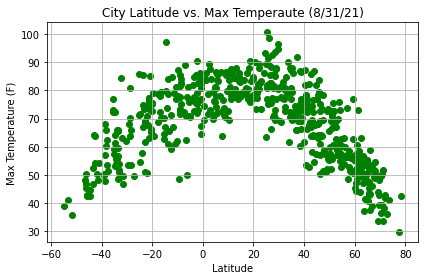

In [41]:
# create scatter plot
fig, ax= plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Max_temp"], marker="o", color="green");
ax.set(ylabel="Max Temperature (F)",
       xlabel="Latitude",
       title="City Latitude vs. Max Temperaute (8/31/21)");
fig.tight_layout();
ax.grid();
plt.savefig("../output_data/lat_v_temp.png")

## Latitude vs. Humidity Plot

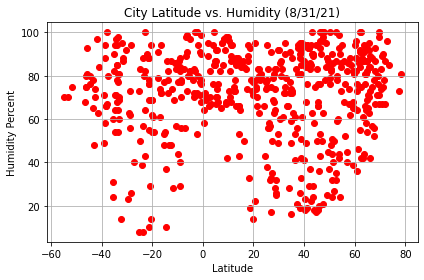

In [42]:
# create scatter plot
fig2, a2x= plt.subplots()
a2x.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="red");
a2x.set(ylabel="Humidity Percent",
       xlabel="Latitude",
       title="City Latitude vs. Humidity (8/31/21)");
fig2.tight_layout();
a2x.grid();
plt.savefig("../output_data/lat_v_humidity.png")

## Latitude vs. Cloudiness Plot

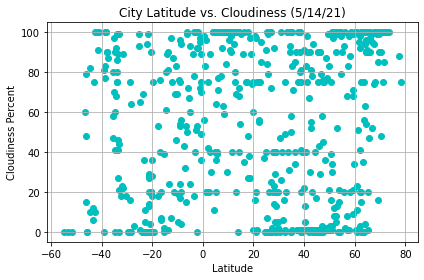

In [16]:
# create scatter plot
fig3, ax3= plt.subplots()
ax3.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="c");
ax3.set(ylabel="Cloudiness Percent",
       xlabel="Latitude",
       title="City Latitude vs. Cloudiness (5/14/21)");
fig3.tight_layout();
ax3.grid();
plt.savefig("../output_data/lat_v_Cloudiness.png")

## Latitude vs. Wind Speed Plot

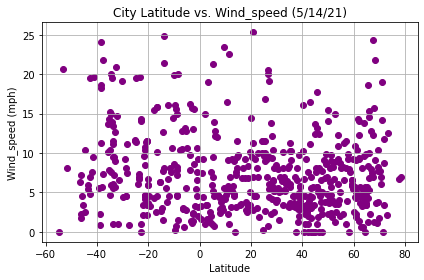

In [17]:
# create scatter plot
fig4, ax4= plt.subplots()
ax4.scatter(weather_df["Lat"], weather_df["Wind_speed"], marker="o", color="purple");
ax4.set(ylabel="Wind_speed (mph)",
       xlabel="Latitude",
       title="City Latitude vs. Wind_speed (5/14/21)");
fig4.tight_layout();
ax4.grid();
plt.savefig("../output_data/lat_v_Windspeed.png")

## Linear Regression

In [21]:
# Identify Northern Hemisphere for each city
northemp_df = pd.DataFrame(weather_df.loc[weather_df["Lat"] >= 0])
northemp_df

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
City,,,,,,,,
a coruna,43.3713,-8.3960,63.93,90,0,3.00,ES,1630388641
abalak,58.1286,68.5944,51.37,62,88,7.92,RU,1630388714
abu dhabi,24.4667,54.3667,93.31,43,0,11.50,AE,1630388534
ada,43.4166,-116.1262,72.21,29,1,6.91,US,1630388752
adrar,20.5022,-10.0711,90.12,22,16,9.48,MR,1630388625
...,...,...,...,...,...,...,...,...
yumen,40.2833,97.2000,81.91,18,13,10.31,CN,1630388627
zhangye,38.9342,100.4517,75.94,33,81,2.84,CN,1630388537
zheleznodorozhnyy,55.7503,38.0042,63.12,68,93,8.25,RU,1630388761


In [19]:
# Identify Southern Hemisphere for each city
southemp_df = pd.DataFrame(weather_df.loc[weather_df["Lat"] < 0])
southemp_df

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
City,,,,,,,,
ahipara,-35.1667,173.1667,57.36,90,97,7.83,NZ,1630388736
airai,-8.9266,125.4092,77.70,29,24,4.72,TL,1630388534
alice springs,-23.7000,133.8833,85.55,8,0,6.91,AU,1630388770
amuntai,-2.4177,115.2494,90.45,53,92,1.43,ID,1630388687
ancud,-41.8697,-73.8203,50.43,97,100,7.61,CL,1630388524
...,...,...,...,...,...,...,...,...
wanaka,-44.7000,169.1500,42.71,80,82,2.51,NZ,1630388767
warrnambool,-38.3833,142.4833,65.80,66,100,18.59,AU,1630388589
willowmore,-33.2926,23.4895,49.01,69,44,9.51,ZA,1630388666


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
pd.to_datetime(1630388593, unit='s')


Timestamp('2021-08-31 05:43:13')

the r-value is 0.634781985301706


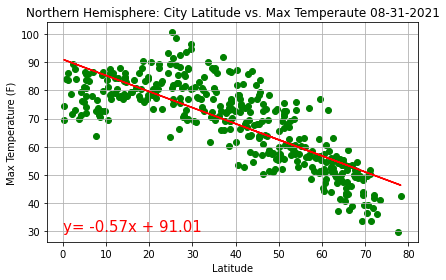

In [29]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(northemp_df["Lat"], northemp_df["Max_temp"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = northemp_df["Lat"] * slope + intercept

# create scatter plot
fig5, ax5= plt.subplots()
ax5.scatter(northemp_df["Lat"], northemp_df["Max_temp"], marker="o", color="green");
ax5.plot(northemp_df["Lat"],regress_values,"r-");
ax5.set(ylabel="Max Temperature (F)",
       xlabel="Latitude",
       title="Northern Hemisphere: City Latitude vs. Max Temperaute 08-31-2021");
ax5.annotate(line_eq, (0,30),fontsize=15,color="red");
fig5.tight_layout();
ax5.grid();
plt.savefig("../output_data/north_lat_v_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is 0.5179105941646437


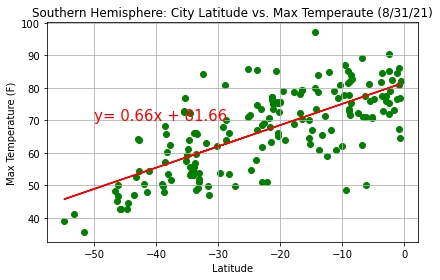

In [30]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(southemp_df["Lat"], southemp_df["Max_temp"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = southemp_df["Lat"] * slope + intercept

# create scatter plot
fig6, ax6= plt.subplots()
ax6.scatter(southemp_df["Lat"], southemp_df["Max_temp"], marker="o", color="green");
ax6.plot(southemp_df["Lat"],regress_values,"r-");
ax6.set(ylabel="Max Temperature (F)",
       xlabel="Latitude",
       title="Southern Hemisphere: City Latitude vs. Max Temperaute (8/31/21)");
ax6.annotate(line_eq, (-50,70),fontsize=15,color="red");
fig6.tight_layout();
ax6.grid();
plt.savefig("../output_data/south_lat_v_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is 9.024362059032294e-05


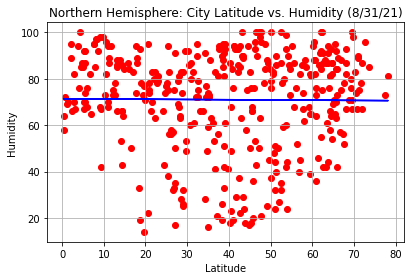

In [31]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(northemp_df["Lat"], northemp_df["Humidity"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = northemp_df["Lat"] * slope + intercept

# create scatter plot
fig7, ax7= plt.subplots()
ax7.scatter(northemp_df["Lat"], northemp_df["Humidity"], marker="o", color="red");
ax7.plot(northemp_df["Lat"],regress_values,"b-");
ax7.set(ylabel="Humidity",
       xlabel="Latitude",
       title="Northern Hemisphere: City Latitude vs. Humidity (8/31/21)");
ax7.annotate(line_eq, (50,0),fontsize=15,color="blue");
fig7.tight_layout();
ax7.grid();
plt.savefig("../output_data/north_lat_v_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is 0.006629113158213674


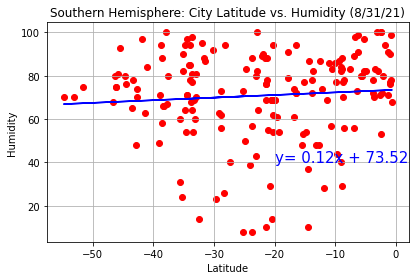

In [33]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(southemp_df["Lat"], southemp_df["Humidity"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = southemp_df["Lat"] * slope + intercept

# create scatter plot
fig8, ax8= plt.subplots()
ax8.scatter(southemp_df["Lat"], southemp_df["Humidity"], marker="o", color="red");
ax8.plot(southemp_df["Lat"],regress_values,"b-");
ax8.set(ylabel="Humidity",
       xlabel="Latitude",
       title="Southern Hemisphere: City Latitude vs. Humidity (8/31/21)");
ax8.annotate(line_eq, (-20,40),fontsize=15,color="blue");
fig8.tight_layout();
ax8.grid();
plt.savefig("../output_data/south_lat_v_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is 0.0007332171206103506


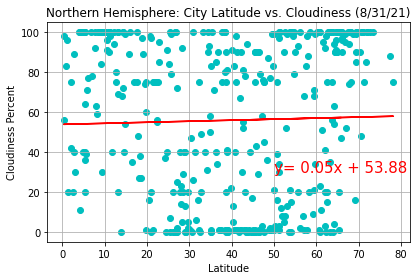

In [35]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(northemp_df["Lat"], northemp_df["Cloudiness"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = northemp_df["Lat"] * slope + intercept

# create scatter plot
fig9, ax9= plt.subplots()
ax9.scatter(northemp_df["Lat"], northemp_df["Cloudiness"], marker="o", color="c");
ax9.plot(northemp_df["Lat"],regress_values,"r-");
ax9.set(ylabel="Cloudiness Percent",
       xlabel="Latitude",
       title="Northern Hemisphere: City Latitude vs. Cloudiness (8/31/21)");
ax9.annotate(line_eq, (50,30),fontsize=15,color="red");
fig9.tight_layout();
ax9.grid();
plt.savefig("../output_data/north_lat_v_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is 0.008802394795167073


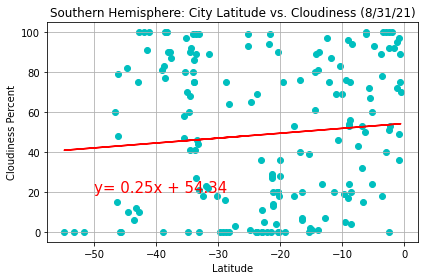

In [37]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(southemp_df["Lat"], southemp_df["Cloudiness"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = southemp_df["Lat"] * slope + intercept

# create scatter plot
fig10, ax10= plt.subplots()
ax10.scatter(southemp_df["Lat"], southemp_df["Cloudiness"], marker="o", color="c");
ax10.plot(southemp_df["Lat"],regress_values,"r-");
ax10.set(ylabel="Cloudiness Percent",
       xlabel="Latitude",
       title="Southern Hemisphere: City Latitude vs. Cloudiness (8/31/21)");
ax10.annotate(line_eq, (-50,20),fontsize=15,color="red");
fig10.tight_layout();
ax10.grid();
plt.savefig("../output_data/south_lat_v_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is 5.8588214217028626e-05


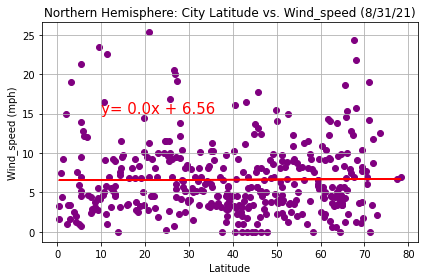

In [38]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(northemp_df["Lat"], northemp_df["Wind_speed"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = northemp_df["Lat"] * slope + intercept

# create scatter plot
fig11, ax11= plt.subplots()
ax11.scatter(northemp_df["Lat"], northemp_df["Wind_speed"], marker="o", color="purple");
ax11.plot(northemp_df["Lat"],regress_values,"r-");
ax11.set(ylabel="Wind_speed (mph)",
       xlabel="Latitude",
       title="Northern Hemisphere: City Latitude vs. Wind_speed (8/31/21)");
ax11.annotate(line_eq, (10,15),fontsize=15,color="red");
fig11.tight_layout();
ax11.grid();
plt.savefig("../output_data/north_lat_v_Windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is 0.010519144353371337


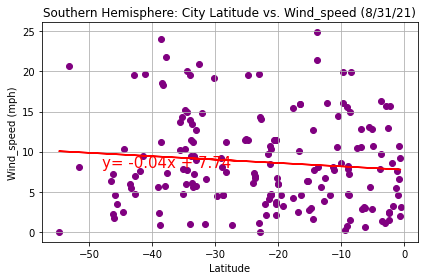

In [39]:
# Obtain slope, intercept, rvalue, pvalue, standard_error for linear regression 
slope, intercept, rvalue, pvalue, standard_error = linregress(southemp_df["Lat"], southemp_df["Wind_speed"])
print(f"the r-value is {rvalue**2}")
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"
regress_values = southemp_df["Lat"] * slope + intercept


# create scatter plot
fig12, ax12= plt.subplots()
ax12.scatter(southemp_df["Lat"], southemp_df["Wind_speed"], marker="o", color="purple");
ax12.plot(southemp_df["Lat"],regress_values,"r-");
ax12.set(ylabel="Wind_speed (mph)",
       xlabel="Latitude",
       title="Southern Hemisphere: City Latitude vs. Wind_speed (8/31/21)");
ax12.annotate(line_eq, (-48,8),fontsize=15,color="red");
fig12.tight_layout();
ax12.grid();
plt.savefig("../output_data/south_lat_v_Windspeed.png")

Observation 1: We can see, and as expected, the temperatures gets warmer the closer it gets to the equator. this graph also shows the temperaure dractically decreaes as it gets closer to the North Pole; however, it shoes a temperaure of about 20. Perhaps it should be colder.

Observation 2: There is little to none relationship between latitude and humidity. This is likely because elevation plays a role into humidity, as well as other weather factors.

Observation 3: There seems to be no corrolation between cloudiness and latitude in the northern and southern hemisphere.

Observation 4: There seemms to be a stronger corrolation between latitude and wind speed in the norther hemiosphere than on the southern hemisphere. they seem to be reacheing a wind speed of about 0 - 10 mph. whereras, the southern hemisephere seems to have more wind closer to the equator.